<a href="https://colab.research.google.com/github/Jkanishkha0305/Hand-gesture/blob/main/ml_classifier/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting the drive so that it will be easier to read datasets and no need to upload in the colab everytime 
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#importing all the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

For Datset collected from Kaggle

In [ ]:
#read the csv file and print the data
df = pd.read_csv('drive/MyDrive/Colab_Assignments/NNFL/asl.csv')
df.columns = [i for i in range(df.shape[1])]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,r
1,0.479899,0.856326,0.000001,0.377909,0.713071,-0.068753,0.366787,0.556996,-0.075835,0.478629,...,0.678905,0.433316,-0.044493,0.648640,0.481058,-0.057290,0.614141,0.539022,-0.047723,r
2,0.507039,0.882985,0.000001,0.389202,0.810820,-0.054068,0.328742,0.654581,-0.084417,0.401559,...,0.619318,0.520379,-0.186026,0.557501,0.614956,-0.170272,0.528143,0.693627,-0.136648,r
3,0.485468,0.945601,0.000001,0.354735,0.819937,-0.069007,0.329839,0.647306,-0.093267,0.444651,...,0.679945,0.508066,-0.146448,0.626687,0.584557,-0.144781,0.581722,0.660929,-0.120851,r
4,0.472641,0.945010,0.000001,0.351330,0.817465,-0.069957,0.334218,0.647094,-0.098873,0.451214,...,0.683455,0.515603,-0.141344,0.628587,0.589892,-0.129525,0.580399,0.661340,-0.099766,r


In [ ]:
df = df.rename(columns={63: 'Output'})
df


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,r
1,0.479899,0.856326,1.083642e-06,0.377909,0.713071,-0.068753,0.366787,0.556996,-0.075835,0.478629,...,0.678905,0.433316,-0.044493,0.648640,0.481058,-0.057290,0.614141,0.539022,-0.047723,r
2,0.507039,0.882985,1.053143e-06,0.389202,0.810820,-0.054068,0.328742,0.654581,-0.084417,0.401559,...,0.619318,0.520379,-0.186026,0.557501,0.614956,-0.170272,0.528143,0.693627,-0.136648,r
3,0.485468,0.945601,1.216589e-06,0.354735,0.819937,-0.069007,0.329839,0.647306,-0.093267,0.444651,...,0.679945,0.508066,-0.146448,0.626687,0.584557,-0.144781,0.581722,0.660929,-0.120851,r
4,0.472641,0.945010,1.347091e-06,0.351330,0.817465,-0.069957,0.334218,0.647094,-0.098873,0.451214,...,0.683455,0.515603,-0.141344,0.628587,0.589892,-0.129525,0.580399,0.661340,-0.099766,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,w
2510,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,w
2511,0.530466,0.876038,6.903637e-07,0.415323,0.794240,-0.089822,0.400819,0.647805,-0.111582,0.530021,...,0.712040,0.439743,-0.085034,0.697607,0.444576,-0.112356,0.667555,0.470670,-0.128214,w
2512,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,w


In [ ]:
#defining X & Y
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (2514, 63)
Labels shape = (2514,)


SVM Classifier

In [ ]:
#splitting X & Y as train and test with 70% training and 30% testing
x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.5, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x1_train, y1_train)

SVC(C=10, gamma=0.1)

In [ ]:
#Predicting using classifiers
y1_pred = svm.predict(x1_test)
y1_pred


array(['m', '6', '6', ..., 'm', '8', 'm'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


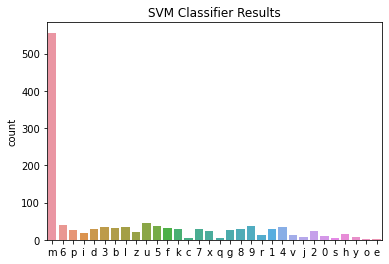

In [ ]:
plt.title('SVM Classifier Results')
sns.countplot(y1_pred)

In [ ]:
cf1_matrix = confusion_matrix(y1_test, y1_pred)
f1 = f1_score(y1_test, y1_pred, average='micro')
recall = recall_score(y1_test, y1_pred, average='micro')
precision = precision_score(y1_test, y1_pred, average='micro')
accuracy = accuracy_score(y1_test, y1_pred)
f1, recall, precision, accuracy

(0.5155131264916468,
 0.5155131264916468,
 0.5155131264916468,
 0.5155131264916468)

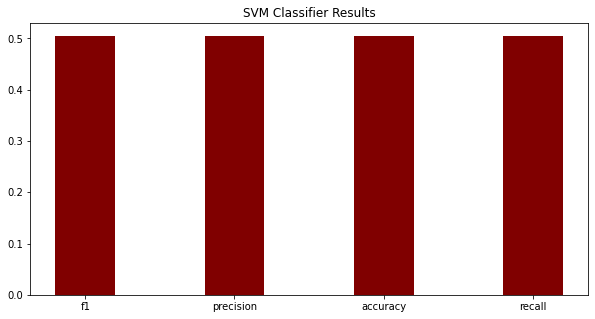

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('SVM Classifier Results')
plt.show()

Logistic Regression 

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.3, random_state=0)
reg = LogisticRegression()
reg.fit(x2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y2_pred = reg.predict(x2_test)
y2_pred

array(['m', '6', '6', 'p', 'm', 'm', 'i', 'd', '3', 'b', 'l', 'z', 'm',
       'u', 'm', 'l', 'm', 'm', 'm', 'm', '5', 'm', 'p', 'f', 'm', 'b',
       'm', '5', 'm', 'k', 'm', '0', 'm', '3', 'm', 'm', '5', 'm', '7',
       '7', 'u', 'm', 'm', '5', 'x', 'q', 'm', 'k', 'b', '6', 'm', 'm',
       'b', 'm', 'l', 'g', 'm', '8', '9', 'x', '1', 'r', 'm', '3', '1',
       'm', 'z', 'm', 'm', 'l', 'm', 'l', 'i', 'd', '4', 'm', 'm', 'f',
       'm', 'm', '3', '5', 'l', 'm', 'x', 'm', 'm', '5', 'b', 'v', 'm',
       'v', '4', 'z', 'd', '8', 'l', '8', 'z', 'm', '7', '7', 'm', '4',
       'm', 'z', 'u', 'm', '4', 'm', 'm', 'm', 'm', 'm', 'j', '6', '2',
       '4', 'x', 'm', 'l', 'm', 'g', 'p', '3', 'm', 'k', '3', '1', 'u',
       'm', '6', '9', 'm', 'm', 'x', '6', '2', 'm', 'd', 'm', 'm', '8',
       '5', 'm', 'k', 'i', 'm', 'm', 'c', '9', 'm', '6', 'm', 'm', '9',
       'm', 'm', 'm', 'i', 'm', 'm', 'b', 'x', 'm', '5', 'm', 'm', 'f',
       '8', '5', 'm', 'f', 'g', 'm', 'i', '0', 'm', 'd', 'd', 'v

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


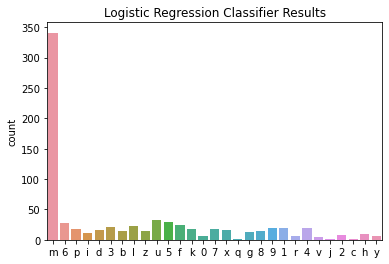

In [ ]:
plt.title('Logistic Regression Classifier Results')
sns.countplot(y2_pred)

In [ ]:
cf2_matrix = confusion_matrix(y2_test, y2_pred)
f1 = f1_score(y2_test, y2_pred, average='micro')
recall = recall_score(y2_test, y2_pred, average='micro')
precision = precision_score(y2_test, y2_pred, average='micro')
accuracy = accuracy_score(y2_test, y2_pred)
f1, recall, precision, accuracy

(0.4688741721854305,
 0.4688741721854305,
 0.4688741721854305,
 0.4688741721854305)

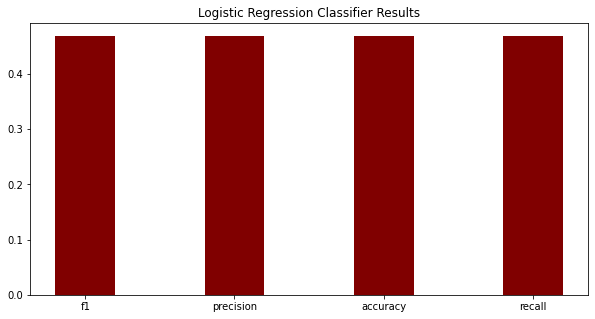

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('Logistic Regression Classifier Results')
plt.show()

Random Forest Classifier

In [ ]:
x4_train, x4_test, y4_train, y4_test = train_test_split(X, Y, test_size=0.5, random_state=0)
rfc = RandomForestClassifier()
rfc.fit(x4_train, y4_train)

RandomForestClassifier()

In [ ]:
y4_pred = rfc.predict(x4_test)
y4_pred


array(['m', '6', 'w', ..., 'm', '8', 'm'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


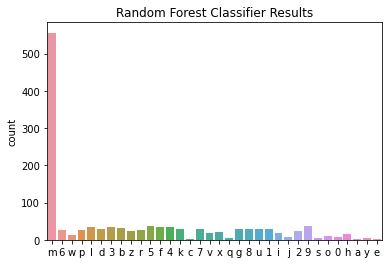

In [ ]:
plt.title('Random Forest Classifier Results')
sns.countplot(y4_pred)

In [ ]:
cf4_matrix = confusion_matrix(y4_test, y4_pred)
f1 = f1_score(y4_test, y4_pred, average='micro')
recall = recall_score(y4_test, y4_pred, average='micro')
precision = precision_score(y4_test, y4_pred, average='micro')
accuracy = accuracy_score(y4_test, y4_pred)
f1, recall, precision, accuracy

(0.5544948289578361,
 0.5544948289578361,
 0.5544948289578361,
 0.5544948289578361)

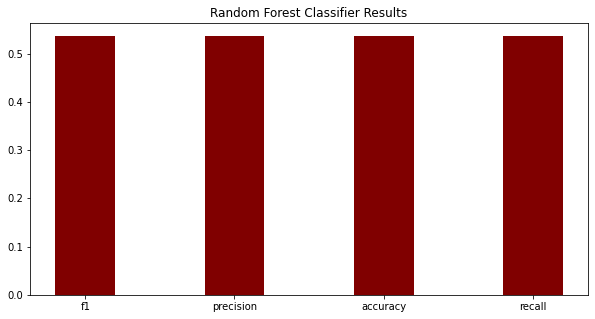

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('Random Forest Classifier Results')
plt.show()

K-Nearest Neighbours Classifiers

In [ ]:
x5_train, x5_test, y5_train, y5_test = train_test_split(X, Y, test_size=0.5, random_state=0)
knn = KNeighborsClassifier()
knn.fit(x5_train, y5_train)

KNeighborsClassifier()

In [ ]:
y5_pred = knn.predict(x5_test)
y5_pred


array(['3', '6', '6', ..., '3', '8', '3'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


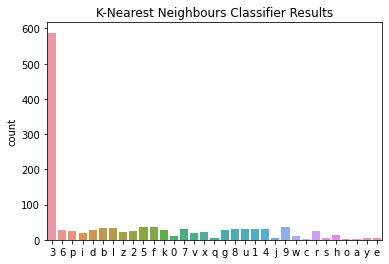

In [ ]:
plt.title('K-Nearest Neighbours Classifier Results')
sns.countplot(y5_pred)

In [ ]:
cf5_matrix = confusion_matrix(y5_test, y5_pred)
f1 = f1_score(y5_test, y5_pred, average='micro')
recall = recall_score(y5_test, y5_pred, average='micro')
precision = precision_score(y5_test, y5_pred, average='micro')
accuracy = accuracy_score(y5_test, y5_pred)
f1, recall, precision, accuracy

(0.5139220365950676,
 0.5139220365950676,
 0.5139220365950676,
 0.5139220365950676)

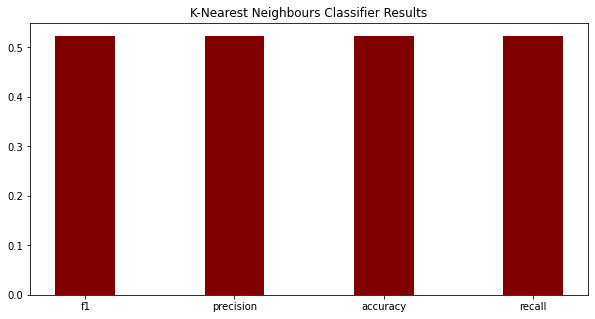

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('K-Nearest Neighbours Classifier Results')
plt.show()

Gaussian Classifiers

In [ ]:
x6_train, x6_test, y6_train, y6_test = train_test_split(X, Y, test_size=0.3, random_state=0)
gnb = GaussianNB()
gnb.fit(x6_train, y6_train)

GaussianNB()

In [ ]:
y6_pred = gnb.predict(x6_test)
y6_pred


array(['t', '4', 'k', 'p', 't', 't', 'x', '1', '3', 'b', 'l', '1', 't',
       'u', 't', 'l', 't', 't', 't', 't', '5', 't', 'p', 'f', 't', '5',
       't', '5', 't', 'k', 't', 'x', 't', '3', 't', 't', '5', 't', '7',
       '7', 'u', 't', 't', '5', 'x', 'p', 't', '3', '4', '4', 't', 't',
       '4', 't', 'l', 'g', 't', '8', 'f', 'x', '1', 'u', 't', '3', '1',
       't', '1', 't', 't', 'l', 't', 'l', 'i', '1', '4', 't', 't', 'f',
       't', 't', '3', '5', 'l', 't', 'x', 't', 't', '5', '4', '3', 't',
       '7', '4', 'z', '1', '8', 'l', '8', '1', 't', '7', '7', 't', '4',
       't', '1', 'k', 't', '4', 't', 't', 't', 't', 't', 'g', 'k', 'u',
       '4', '1', 't', 'l', 't', 'g', 'p', '3', 't', 'k', '3', '1', 'u',
       't', '4', '9', 't', 't', '1', 'u', '7', 't', '1', 't', 't', '8',
       '5', 't', 'k', 'i', 't', 't', 'x', '9', 't', '4', 't', 't', '9',
       't', 't', 't', 'i', 't', 't', 'b', 'x', 't', '5', 't', 't', 'f',
       '8', '5', 't', 'f', 'g', 't', 'i', 'd', 't', '1', '1', '7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


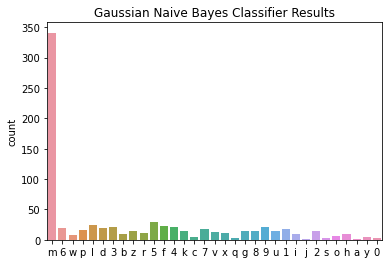

In [ ]:
plt.title('Gaussian Naive Bayes Classifier Results')
sns.countplot(y4_pred)

In [ ]:
cf6_matrix = confusion_matrix(y6_test, y6_pred)
f1 = f1_score(y6_test, y6_pred, average='micro')
recall = recall_score(y6_test, y6_pred, average='micro')
precision = precision_score(y6_test, y6_pred, average='micro')
accuracy = accuracy_score(y6_test, y6_pred)
f1, recall, precision, accuracy

(0.34966887417218545,
 0.34966887417218545,
 0.34966887417218545,
 0.34966887417218545)

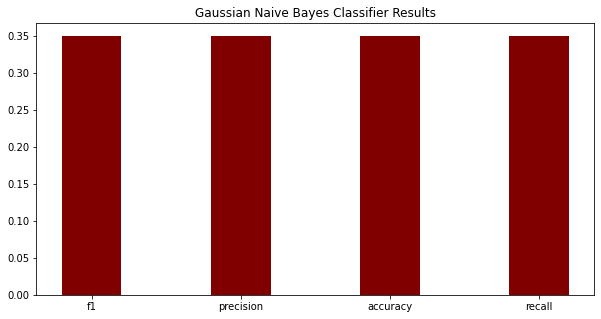

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('Gaussian Naive Bayes Classifier Results')
plt.show()

Plotting the graph for the best accuracy classifier 

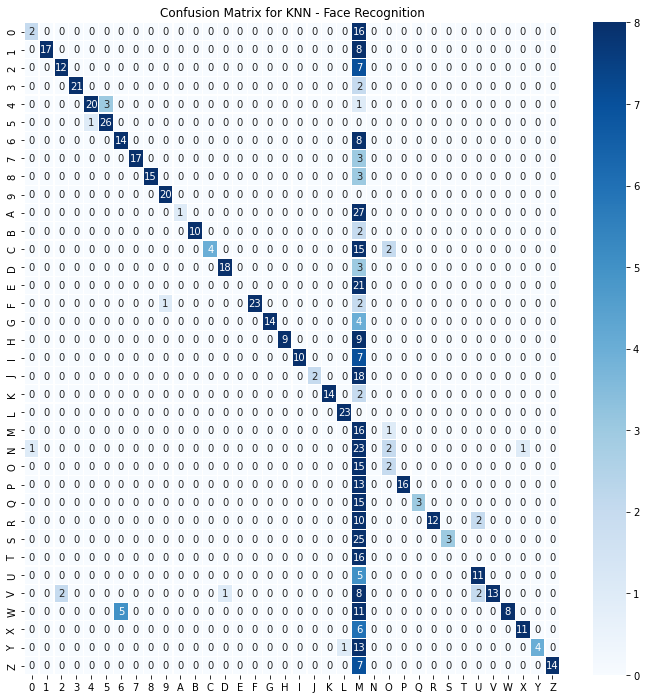

In [ ]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix for KNN - Face Recognition")

maping = sns.heatmap(cf4_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle

# saving the model
with open('drive/MyDrive/Colab_Assignments/NNFL/asl.pkl','wb') as f:
    pickle.dump(rfc,f)

Results of custom dataset

In [ ]:
#read the csv file and print the data
df = pd.read_csv('drive/MyDrive/Colab_Assignments/NNFL/custom.csv')
df.columns = [i for i in range(df.shape[1])]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.483963,0.815781,-9.946348e-08,0.450244,0.706100,-0.027994,0.439240,0.572880,-0.044254,0.429082,...,0.617281,0.684442,-0.069038,0.581071,0.712610,-0.061719,0.556754,0.722495,-0.048869,Happy
1,0.493517,0.801387,-1.054609e-07,0.463074,0.690492,-0.023793,0.454492,0.559139,-0.039351,0.444679,...,0.626675,0.687874,-0.072435,0.588125,0.716165,-0.063649,0.564031,0.723483,-0.050208,Happy
2,0.474794,0.778992,-1.198668e-07,0.438936,0.697238,-0.022526,0.421385,0.570957,-0.034542,0.407677,...,0.578169,0.621828,-0.064958,0.550366,0.663515,-0.056405,0.535809,0.686283,-0.043128,Happy
3,0.418913,0.793710,-2.233648e-07,0.375497,0.709947,-0.015758,0.356040,0.587426,-0.024778,0.340767,...,0.508241,0.644811,-0.059964,0.477155,0.685922,-0.048391,0.468999,0.701300,-0.034880,Happy
4,0.461605,0.821517,-1.533959e-07,0.433717,0.686947,-0.011918,0.426474,0.557077,-0.021748,0.425408,...,0.587570,0.697766,-0.066972,0.548203,0.724671,-0.054615,0.530492,0.734162,-0.039355,Happy


In [ ]:
df = df.rename(columns={63: 'Output'})
df


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.483963,0.815781,-9.946348e-08,0.450244,0.706100,-0.027994,0.439240,0.572880,-0.044254,0.429082,...,0.617281,0.684442,-0.069038,0.581071,0.712610,-0.061719,0.556754,0.722495,-0.048869,Happy
1,0.493517,0.801387,-1.054609e-07,0.463074,0.690492,-0.023793,0.454492,0.559139,-0.039351,0.444679,...,0.626675,0.687874,-0.072435,0.588125,0.716165,-0.063649,0.564031,0.723483,-0.050208,Happy
2,0.474794,0.778992,-1.198668e-07,0.438936,0.697238,-0.022526,0.421385,0.570957,-0.034542,0.407677,...,0.578169,0.621828,-0.064958,0.550366,0.663515,-0.056405,0.535809,0.686283,-0.043128,Happy
3,0.418913,0.793710,-2.233648e-07,0.375497,0.709947,-0.015758,0.356040,0.587426,-0.024778,0.340767,...,0.508241,0.644811,-0.059964,0.477155,0.685922,-0.048391,0.468999,0.701300,-0.034880,Happy
4,0.461605,0.821517,-1.533959e-07,0.433717,0.686947,-0.011918,0.426474,0.557077,-0.021748,0.425408,...,0.587570,0.697766,-0.066972,0.548203,0.724671,-0.054615,0.530492,0.734162,-0.039355,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.709229,0.614102,-1.614874e-07,0.682569,0.507246,0.001715,0.637569,0.414671,-0.007333,0.605993,...,0.559787,0.647901,-0.042191,0.579724,0.651024,-0.029727,0.600677,0.649711,-0.021102,yes
595,0.711528,0.607465,-2.009692e-07,0.682369,0.500068,0.002898,0.635920,0.407146,-0.005385,0.600994,...,0.557444,0.642045,-0.036745,0.577275,0.646379,-0.023580,0.597964,0.646261,-0.014832,yes
596,0.650339,0.648039,-1.534917e-07,0.616402,0.536512,0.003160,0.566618,0.446635,-0.004722,0.529259,...,0.496728,0.696814,-0.031554,0.516109,0.694297,-0.018076,0.536717,0.695074,-0.009063,yes
597,0.852246,0.710838,-1.748159e-07,0.827651,0.607012,0.000329,0.782406,0.503147,-0.011168,0.751359,...,0.703214,0.734989,-0.070995,0.721945,0.734483,-0.059120,0.746880,0.734602,-0.049594,yes


In [ ]:
#defining X & Y
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (599, 63)
Labels shape = (599,)


SVM Classifier

In [ ]:
#splitting X & Y as train and test with 70% training and 30% testing
x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.3, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x1_train, y1_train)

SVC(C=10, gamma=0.1)

In [ ]:
#Predicting using classifiers
y1_pred = svm.predict(x1_test)
y1_pred


array(['no', 'Happy', 'Hi', 'Hi', 'ThankYou', 'Bye', 'ThankYou', 'yes',
       'yes', 'Hi', 'Hi', 'Bye', 'yes', 'yes', 'Bye', 'Bye', 'ThankYou',
       'Bye', 'ThankYou', 'Bye', 'ThankYou', 'Happy', 'ThankYou', 'no',
       'ThankYou', 'yes', 'Happy', 'Happy', 'Bye', 'yes', 'Hi', 'no',
       'ThankYou', 'yes', 'Happy', 'Hi', 'Bye', 'yes', 'Bye', 'ThankYou',
       'Bye', 'Happy', 'no', 'Happy', 'Bye', 'no', 'Hi', 'Hi', 'Bye',
       'no', 'Hi', 'no', 'ThankYou', 'ThankYou', 'no', 'Hi', 'yes', 'Bye',
       'no', 'Bye', 'ThankYou', 'Hi', 'no', 'Hi', 'yes', 'Happy', 'no',
       'Bye', 'Happy', 'no', 'Happy', 'Happy', 'Bye', 'Bye', 'Hi', 'Bye',
       'ThankYou', 'Happy', 'Hi', 'ThankYou', 'Happy', 'Happy', 'Happy',
       'Happy', 'yes', 'Hi', 'ThankYou', 'yes', 'Hi', 'yes', 'Bye', 'no',
       'Happy', 'no', 'Happy', 'Happy', 'no', 'no', 'ThankYou', 'Happy',
       'Happy', 'yes', 'yes', 'ThankYou', 'Hi', 'yes', 'Hi', 'ThankYou',
       'ThankYou', 'yes', 'Bye', 'Hi', 'no', 'yes', 'Th

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


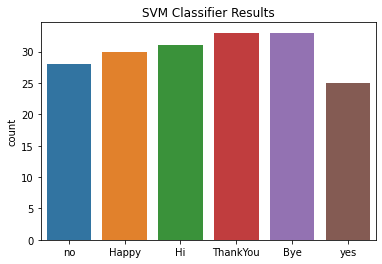

In [ ]:
plt.title('SVM Classifier Results')
sns.countplot(y1_pred)

In [ ]:
cf1_matrix = confusion_matrix(y1_test, y1_pred)
f1 = f1_score(y1_test, y1_pred, average='micro')
recall = recall_score(y1_test, y1_pred, average='micro')
precision = precision_score(y1_test, y1_pred, average='micro')
accuracy = accuracy_score(y1_test, y1_pred)
f1, recall, precision, accuracy

(0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667)

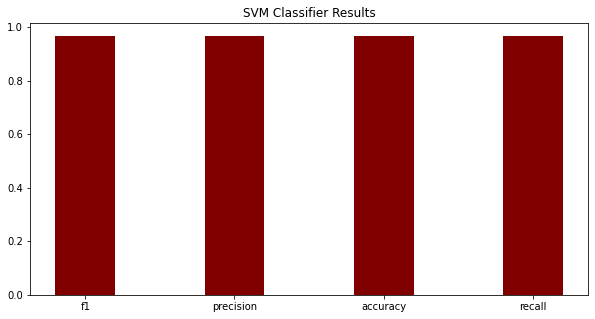

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('SVM Classifier Results')
plt.show()

Logistic Regression 

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.3, random_state=0)
reg = LogisticRegression()
reg.fit(x2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y2_pred = reg.predict(x2_test)
y2_pred

array(['no', 'Happy', 'Hi', 'Hi', 'ThankYou', 'Bye', 'ThankYou', 'yes',
       'yes', 'Hi', 'Hi', 'Bye', 'yes', 'yes', 'Bye', 'Bye', 'ThankYou',
       'Bye', 'ThankYou', 'Bye', 'ThankYou', 'Happy', 'ThankYou', 'no',
       'ThankYou', 'yes', 'Happy', 'Happy', 'Bye', 'yes', 'Hi', 'no',
       'ThankYou', 'yes', 'Happy', 'Hi', 'Bye', 'yes', 'Bye', 'ThankYou',
       'Bye', 'Happy', 'no', 'Happy', 'Bye', 'no', 'Hi', 'Hi', 'Bye',
       'no', 'Hi', 'no', 'ThankYou', 'ThankYou', 'no', 'Hi', 'yes', 'Bye',
       'no', 'Bye', 'ThankYou', 'Hi', 'no', 'Hi', 'yes', 'Happy', 'no',
       'Bye', 'Happy', 'no', 'Happy', 'Happy', 'Bye', 'Bye', 'Hi', 'Bye',
       'ThankYou', 'Happy', 'Bye', 'ThankYou', 'Happy', 'Happy', 'Happy',
       'Happy', 'yes', 'Hi', 'ThankYou', 'yes', 'Hi', 'yes', 'Bye', 'no',
       'Happy', 'no', 'Happy', 'Happy', 'no', 'no', 'ThankYou', 'Happy',
       'Happy', 'yes', 'yes', 'ThankYou', 'Hi', 'yes', 'Hi', 'ThankYou',
       'ThankYou', 'yes', 'Bye', 'Hi', 'no', 'yes', 'T

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


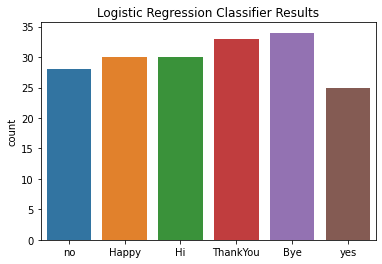

In [ ]:
plt.title('Logistic Regression Classifier Results')
sns.countplot(y2_pred)

In [ ]:
cf2_matrix = confusion_matrix(y2_test, y2_pred)
f1 = f1_score(y2_test, y2_pred, average='micro')
recall = recall_score(y2_test, y2_pred, average='micro')
precision = precision_score(y2_test, y2_pred, average='micro')
accuracy = accuracy_score(y2_test, y2_pred)
f1, recall, precision, accuracy

(0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222)

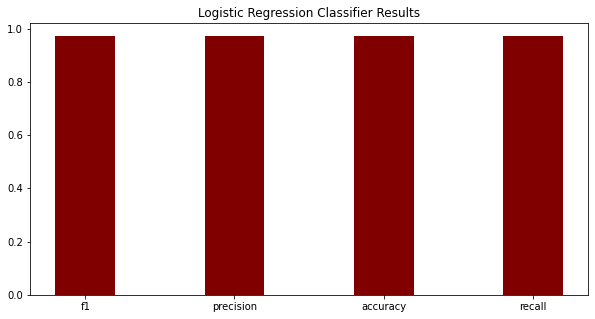

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('Logistic Regression Classifier Results')
plt.show()

Random Forest Classifier

In [ ]:
x4_train, x4_test, y4_train, y4_test = train_test_split(X, Y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit(x4_train, y4_train)

RandomForestClassifier()

In [ ]:
y4_pred = rfc.predict(x4_test)
y4_pred


array(['no', 'Happy', 'Happy', 'Hi', 'ThankYou', 'Bye', 'ThankYou', 'yes',
       'yes', 'Hi', 'Hi', 'Bye', 'yes', 'yes', 'Bye', 'Bye', 'ThankYou',
       'Bye', 'ThankYou', 'Bye', 'Bye', 'Happy', 'ThankYou', 'no',
       'ThankYou', 'yes', 'Happy', 'Happy', 'Bye', 'yes', 'Hi', 'no',
       'ThankYou', 'yes', 'Happy', 'Hi', 'Bye', 'yes', 'Bye', 'ThankYou',
       'Bye', 'Happy', 'no', 'Happy', 'Bye', 'no', 'Hi', 'Hi', 'Bye',
       'no', 'Hi', 'no', 'ThankYou', 'ThankYou', 'no', 'Hi', 'yes', 'Bye',
       'no', 'Bye', 'ThankYou', 'Hi', 'no', 'Hi', 'yes', 'Happy', 'no',
       'Bye', 'Happy', 'no', 'Happy', 'Happy', 'Bye', 'Bye', 'Hi', 'Bye',
       'ThankYou', 'Happy', 'Hi', 'ThankYou', 'Happy', 'Happy', 'Happy',
       'Happy', 'yes', 'Hi', 'ThankYou', 'yes', 'Hi', 'yes', 'Bye', 'no',
       'Happy', 'no', 'Happy', 'Happy', 'no', 'no', 'ThankYou', 'Happy',
       'Happy', 'yes', 'yes', 'ThankYou', 'Hi', 'yes', 'Hi', 'ThankYou',
       'ThankYou', 'yes', 'Bye', 'Hi', 'no', 'yes', 'Than

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


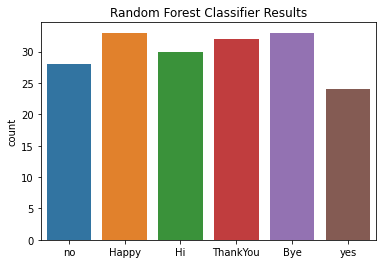

In [ ]:
plt.title('Random Forest Classifier Results')
sns.countplot(y4_pred)

In [ ]:
cf4_matrix = confusion_matrix(y4_test, y4_pred)
f1 = f1_score(y4_test, y4_pred, average='micro')
recall = recall_score(y4_test, y4_pred, average='micro')
precision = precision_score(y4_test, y4_pred, average='micro')
accuracy = accuracy_score(y4_test, y4_pred)
f1, recall, precision, accuracy

(0.9500000000000001, 0.95, 0.95, 0.95)

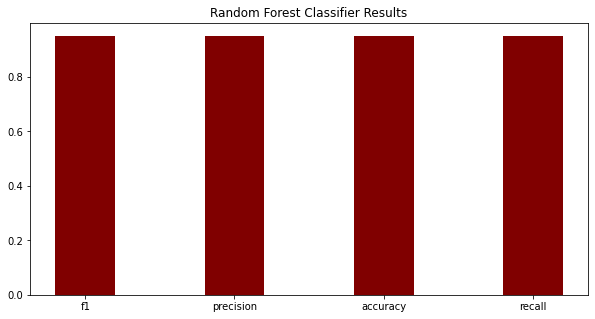

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('Random Forest Classifier Results')
plt.show()

K-Nearest Neighbours Classifiers

In [ ]:
x5_train, x5_test, y5_train, y5_test = train_test_split(X, Y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(x5_train, y5_train)

KNeighborsClassifier()

In [ ]:
y5_pred = knn.predict(x5_test)
y5_pred


array(['no', 'Happy', 'Happy', 'Hi', 'ThankYou', 'Bye', 'ThankYou', 'yes',
       'yes', 'Hi', 'Hi', 'Bye', 'yes', 'yes', 'Bye', 'Bye', 'ThankYou',
       'Bye', 'ThankYou', 'Bye', 'ThankYou', 'Happy', 'ThankYou', 'no',
       'ThankYou', 'yes', 'Happy', 'Happy', 'Bye', 'yes', 'Hi', 'no',
       'ThankYou', 'yes', 'Happy', 'Hi', 'Bye', 'yes', 'Bye', 'ThankYou',
       'Bye', 'Happy', 'no', 'Happy', 'Bye', 'no', 'Hi', 'Hi', 'Bye',
       'no', 'Hi', 'no', 'ThankYou', 'ThankYou', 'no', 'Hi', 'yes', 'Bye',
       'no', 'Bye', 'ThankYou', 'Hi', 'no', 'Hi', 'yes', 'Happy', 'no',
       'Bye', 'Happy', 'no', 'Happy', 'Happy', 'Bye', 'Bye', 'Hi', 'Bye',
       'ThankYou', 'Happy', 'Bye', 'ThankYou', 'Happy', 'Happy', 'Happy',
       'Happy', 'yes', 'Hi', 'ThankYou', 'yes', 'Hi', 'yes', 'Bye', 'no',
       'Happy', 'no', 'Happy', 'Happy', 'no', 'no', 'ThankYou', 'Happy',
       'Happy', 'yes', 'yes', 'ThankYou', 'Hi', 'yes', 'Hi', 'ThankYou',
       'ThankYou', 'yes', 'Bye', 'Hi', 'no', 'yes',

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


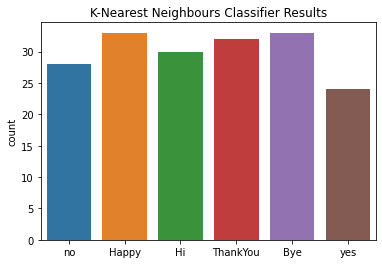

In [ ]:
plt.title('K-Nearest Neighbours Classifier Results')
sns.countplot(y4_pred)

In [ ]:
cf5_matrix = confusion_matrix(y5_test, y5_pred)
f1 = f1_score(y5_test, y5_pred, average='micro')
recall = recall_score(y5_test, y5_pred, average='micro')
precision = precision_score(y5_test, y5_pred, average='micro')
accuracy = accuracy_score(y5_test, y5_pred)
f1, recall, precision, accuracy

(0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667)

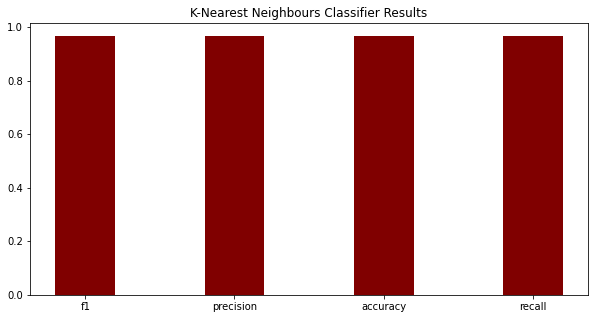

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('K-Nearest Neighbours Classifier Results')
plt.show()

Gaussian Classifiers

In [ ]:
x6_train, x6_test, y6_train, y6_test = train_test_split(X, Y, test_size=0.3, random_state=0)
gnb = GaussianNB()
gnb.fit(x6_train, y6_train)

GaussianNB()

In [ ]:
y6_pred = gnb.predict(x6_test)
y6_pred


array(['Hi', 'Happy', 'Happy', 'Hi', 'ThankYou', 'Bye', 'ThankYou', 'yes',
       'yes', 'Hi', 'Hi', 'Bye', 'yes', 'yes', 'Bye', 'Bye', 'ThankYou',
       'Bye', 'ThankYou', 'Bye', 'Hi', 'Happy', 'ThankYou', 'no',
       'ThankYou', 'yes', 'Happy', 'Happy', 'Bye', 'yes', 'Hi', 'Hi',
       'ThankYou', 'yes', 'Happy', 'Hi', 'Bye', 'yes', 'Bye', 'ThankYou',
       'Bye', 'Happy', 'no', 'Happy', 'Bye', 'no', 'Hi', 'Hi', 'ThankYou',
       'no', 'Hi', 'Hi', 'ThankYou', 'ThankYou', 'no', 'Hi', 'yes', 'Bye',
       'no', 'Bye', 'ThankYou', 'Hi', 'no', 'Hi', 'yes', 'Happy', 'no',
       'Bye', 'Happy', 'no', 'Happy', 'Happy', 'Bye', 'Bye', 'Hi',
       'Happy', 'ThankYou', 'Happy', 'Happy', 'ThankYou', 'Happy',
       'Happy', 'Happy', 'Happy', 'yes', 'Hi', 'ThankYou', 'yes', 'Hi',
       'yes', 'Bye', 'no', 'Happy', 'no', 'Happy', 'Happy', 'no', 'no',
       'ThankYou', 'Happy', 'Happy', 'yes', 'yes', 'ThankYou', 'Hi',
       'yes', 'Hi', 'ThankYou', 'ThankYou', 'yes', 'Bye', 'Hi', 'no',
   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


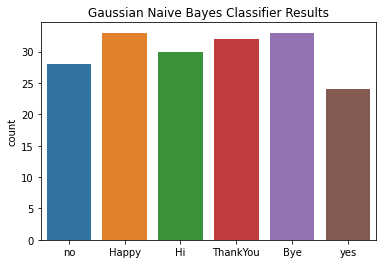

In [ ]:
plt.title('Gaussian Naive Bayes Classifier Results')
sns.countplot(y4_pred)

In [ ]:
cf6_matrix = confusion_matrix(y6_test, y6_pred)
f1 = f1_score(y6_test, y6_pred, average='micro')
recall = recall_score(y6_test, y6_pred, average='micro')
precision = precision_score(y6_test, y6_pred, average='micro')
accuracy = accuracy_score(y6_test, y6_pred)
f1, recall, precision, accuracy

(0.9055555555555556,
 0.9055555555555556,
 0.9055555555555556,
 0.9055555555555556)

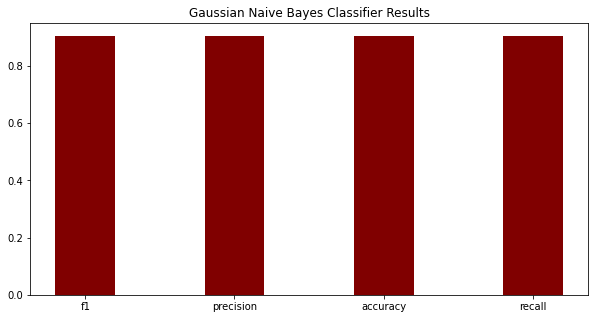

In [ ]:
data = {'f1': f1 ,'precision': precision , 'accuracy': accuracy , 'recall': recall}
param = list(data.keys())
pred = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(param,pred,color = 'maroon',width = 0.4)
plt.title('Gaussian Naive Bayes Classifier Results')
plt.show()

Plotting the graph for the best accuracy classifier 

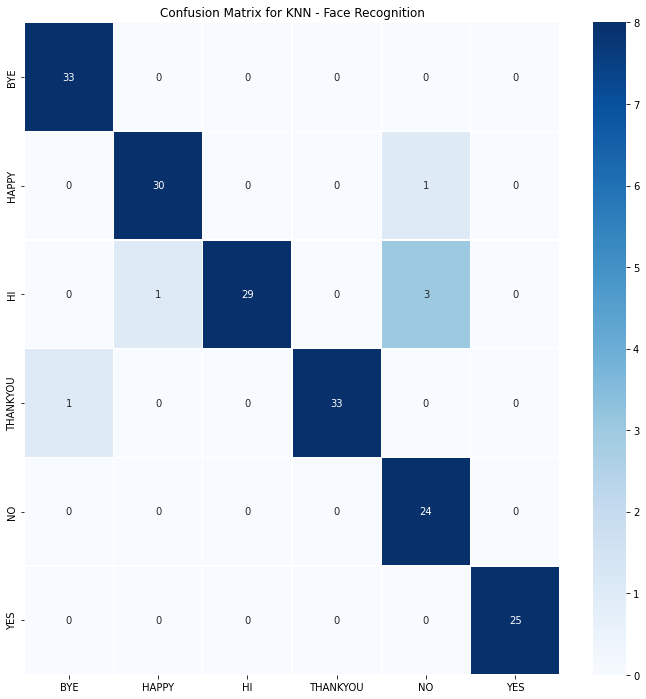

In [ ]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix for KNN - Face Recognition")

maping = sns.heatmap(cf5_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle

# saving the model
with open('drive/MyDrive/Colab_Assignments/NNFL/custom.pkl','wb') as f:
    pickle.dump(rfc,f)